<a href="https://colab.research.google.com/github/JasmineD0401/SMA-LABS/blob/main/Sentiment_Analysis_(without_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud


# Download the VADER lexicon
nltk.download('vader_lexicon')
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load the dataset
df = pd.read_csv('review.csv')
print(df.head())

   author_id               Author                 Date  Rating  Helpful count  \
0           1                 V K   2023-12-01 8:58:24       5              1   
1           2     Vidyanand Joshi  2023-12-01 18:00:13       5              0   
2           3  Sreenath Raghunath  2023-12-02 14:45:25       4              0   
3           4    Suryakant Jadhav  2023-12-04 23:15:44       5              0   
4           5      Prashant Pasad   2023-12-05 8:11:02       3              0   

                                              Review             Reviewer Data  
0  Awesome restaurant the ambiance is too good wi...                  1 review  
1  Lalji prajapati very nice service by him\nAmaz...                 6 reviews  
2                                                NaN  Local Guide · 31 reviews  
3                                                NaN  Local Guide · 16 reviews  
4                                                NaN    Local Guide · 4 photos  


In [ ]:
# Check data types of columns
print(df.dtypes)
print("\n")
# Summary statistics
print(df.describe())
print("\n")
# Check for missing values
print(df.isnull().sum())
print("\n")
# Unique values in categorical columns
print(df['Author'].unique())
print(df['Reviewer Data'].unique())
print("\n")

author_id         int64
Author           object
Date             object
Rating            int64
Helpful count     int64
Review           object
Reviewer Data    object
dtype: object


       author_id       Rating  Helpful count
count  100.000000  100.000000     100.000000
mean    50.500000    3.930000       0.270000
std     29.011492    1.444285       0.509605
min      1.000000    1.000000       0.000000
25%     25.750000    4.000000       0.000000
50%     50.500000    5.000000       0.000000
75%     75.250000    5.000000       0.000000
max    100.000000    5.000000       2.000000


author_id         0
Author            0
Date              0
Rating            0
Helpful count     0
Review           46
Reviewer Data     4
dtype: int64


['V K' 'Vidyanand Joshi' 'Sreenath Raghunath' 'Suryakant Jadhav'
 'Prashant Pasad' 'Ajay Goswami' 'Ranveer Singh' 'Pranoti Joshi'
 'Devesh Chaudhari' 'pradeep prajapati' 'Neelima Date' 'Divyani Patil'
 'Mohd Shahjad' 'sunny francis' 'Pappya Jadhav' 'Yadn

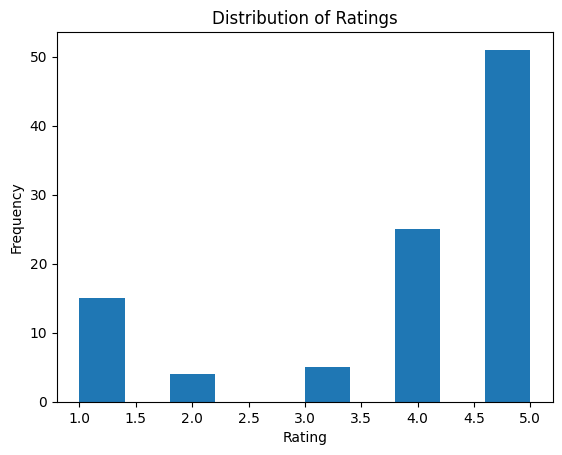

In [ ]:
# Histogram of ratings
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
# Define a function to remove URLs from text
def remove_urls(text):
    if isinstance(text, str):  # Check if text is a string
        # Define the regex pattern to match URLs
        url_pattern = r'https?://\S+|www\.\S+'
        # Replace URLs with an empty string
        clean_text = re.sub(url_pattern, '', text)
        return clean_text
    else:
        return text  # Return unchanged if text is not a string

# Apply the function to the 'Review' column
df['Review'] = df['Review'].apply(remove_urls)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())


   author_id               Author                 Date  Rating  Helpful count  \
0           1                 V K   2023-12-01 8:58:24       5              1   
1           2     Vidyanand Joshi  2023-12-01 18:00:13       5              0   
2           3  Sreenath Raghunath  2023-12-02 14:45:25       4              0   
3           4    Suryakant Jadhav  2023-12-04 23:15:44       5              0   
4           5      Prashant Pasad   2023-12-05 8:11:02       3              0   

                                              Review             Reviewer Data  
0  Awesome restaurant the ambiance is too good wi...                  1 review  
1  Lalji prajapati very nice service by him\nAmaz...                 6 reviews  
2                                                NaN  Local Guide · 31 reviews  
3                                                NaN  Local Guide · 16 reviews  
4                                                NaN    Local Guide · 4 photos  


In [ ]:
# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Define a function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenize the text
        tokens = word_tokenize(text)

        # Convert tokens to lowercase
        tokens = [token.lower() for token in tokens]

        # Remove punctuation
        tokens = [token for token in tokens if token not in string.punctuation]

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        # Stemming
        tokens = [stemmer.stem(token) for token in tokens]

        # Join tokens back into a single string
        preprocessed_text = ' '.join(tokens)

        return preprocessed_text
    else:
        return ''  # Return an empty string if text is not a string

# Apply the preprocessing function to the 'Review' column
df['Review'] = df['Review'].apply(preprocess_text)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())


   author_id               Author                 Date  Rating  Helpful count  \
0           1                 V K   2023-12-01 8:58:24       5              1   
1           2     Vidyanand Joshi  2023-12-01 18:00:13       5              0   
2           3  Sreenath Raghunath  2023-12-02 14:45:25       4              0   
3           4    Suryakant Jadhav  2023-12-04 23:15:44       5              0   
4           5      Prashant Pasad   2023-12-05 8:11:02       3              0   

                                              Review             Reviewer Data  
0  awesom restaur ambianc good great live music e...                  1 review  
1  lalji prajapati nice servic amaz dish pizza mu...                 6 reviews  
2                                                     Local Guide · 31 reviews  
3                                                     Local Guide · 16 reviews  
4                                                       Local Guide · 4 photos  


In [ ]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(text):
    # Get sentiment scores
    sentiment_scores = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'Review' column
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Display the first few rows of the DataFrame with sentiment
print(df.head())


   author_id               Author                 Date  Rating  Helpful count  \
0           1                 V K   2023-12-01 8:58:24       5              1   
1           2     Vidyanand Joshi  2023-12-01 18:00:13       5              0   
2           3  Sreenath Raghunath  2023-12-02 14:45:25       4              0   
3           4    Suryakant Jadhav  2023-12-04 23:15:44       5              0   
4           5      Prashant Pasad   2023-12-05 8:11:02       3              0   

                                              Review  \
0  awesom restaur ambianc good great live music e...   
1  lalji prajapati nice servic amaz dish pizza mu...   
2                                                      
3                                                      
4                                                      

              Reviewer Data Sentiment  
0                  1 review  Positive  
1                 6 reviews  Positive  
2  Local Guide · 31 reviews   Neutral  
3  Local Guide ·

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


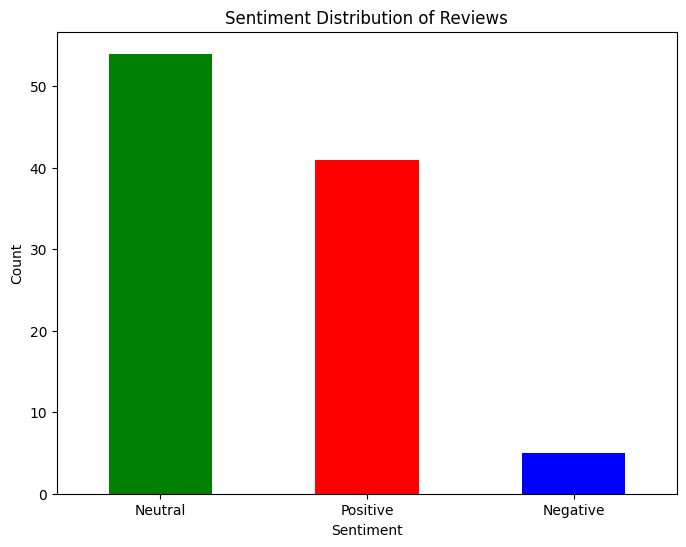

In [ ]:
# Calculate sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


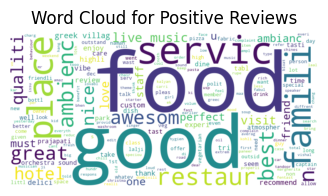

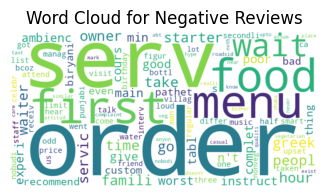

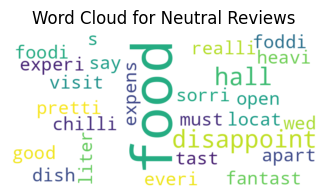

In [ ]:
# Define a function to generate word cloud for a specific sentiment
def generate_wordcloud(sentiment):
    # Filter reviews by sentiment
    filtered_reviews = df[df['Sentiment'] == sentiment]['Review']

    # Join all reviews into a single string
    text = ' '.join(filtered_reviews)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot word cloud
    plt.figure(figsize=(5, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')


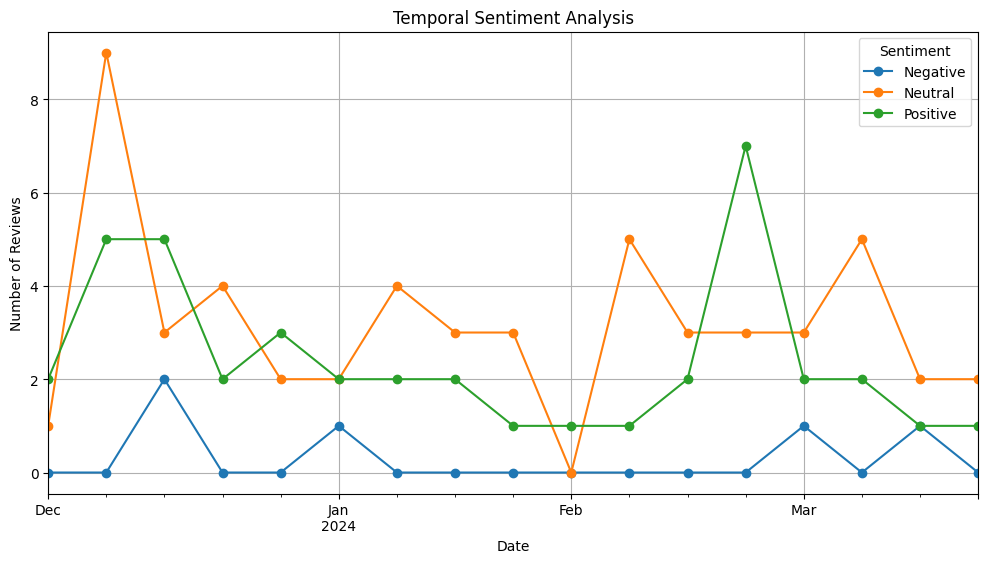

In [ ]:
# Assuming you have a 'Date' column in your DataFrame indicating the date of each review
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the time interval for analysis (e.g., weekly)
time_interval = 'W'  # Weekly

# Group the data by the specified time interval and count the occurrences of each sentiment label
sentiment_counts_over_time = df.groupby(pd.Grouper(key='Date', freq=time_interval))['Sentiment'].value_counts().unstack()

# If 'Negative' sentiment label doesn't have proper data, fill NaN values with 0
sentiment_counts_over_time.fillna(0, inplace=True)

# Plot sentiment trends over time
sentiment_counts_over_time.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Temporal Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()
